In [1]:
# solve imports and reload
import os
cwd = os.getcwd()
import sys
sys.path = [cwd] + sys.path
%load_ext autoreload
%autoreload 2
# external imports
from matplotlib import pyplot as plt
import numpy as np
# internal imports
import data
import visualization
import evaluation
import geometry
import utils

ModuleNotFoundError: No module named 'tqdm'

100%|██████████| 370/370 [00:02<00:00, 142.52it/s]


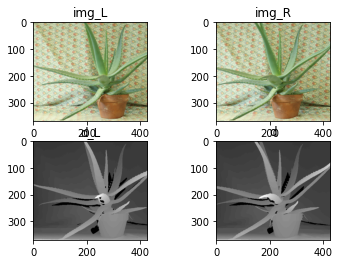

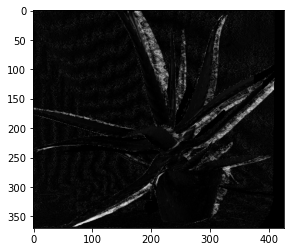

In [2]:
"""			3.1  Sanity Check			"""
# choose scene
chosen_scene = data.SCENES_WITH_GT_DISPARITIES[data.CHOSEN_GT_SCENE_INDEX]
# get images and gt disparities of scene
img_l, img_r = data.get_scene_images(chosen_scene)
d_l, d = data.get_scene_disparities(chosen_scene)
# visualize images and gt disparities
visualization.plot_scene(img_l, img_r, d_l, d)
# visualize a validation of gt disparities
differences_image = evaluation.get_disparity_rgb_distances(img_l, img_r, d)
visualization.plot_image(differences_image)


In [3]:
"""			3.2  3D Plot				"""
# extract constants
h, w = img_r.shape[:2]
x_0, y_0 = geometry.get_image_center(h=h, w=w)
# calculate 3d points from the two views
points_r = geometry.get_3d_points_from_disparities(disparity_map=d,
												   focal_length=data.FOCAL_LENGTH, base_line=data.BASELINE,
												   x_0=x_0, y_0=y_0,
												   right_image=True)
points_l = geometry.get_3d_points_from_disparities(disparity_map=d_l,
												   focal_length=data.FOCAL_LENGTH, base_line=data.BASELINE,
												   x_0=x_0, y_0=y_0,
												   right_image=False)
points_all = np.concatenate((points_l.reshape(4, -1), points_r.reshape(4, -1)), axis=1)
point_colors_all = np.concatenate((img_l.reshape(-1, 3), img_r.reshape(-1, 3)), axis=0)
# get camera matrices for the two views
P_r, K_r = geometry.get_camera_matrices(focal_length=data.FOCAL_LENGTH, base_line=data.BASELINE,
										x_0=x_0, y_0=y_0)
P_l, K_l = geometry.get_camera_matrices(focal_length=data.FOCAL_LENGTH, base_line=0,
										x_0=x_0, y_0=y_0)
# plot the 3D points and the camera
utils.plot_cameras(P=np.stack((P_l, P_r), axis=0),
				   K=np.stack((K_l, K_r), axis=0),
				   X=points_all,
				   title="3.2_3D_plot_reconstruction",
				   point_colors=point_colors_all)


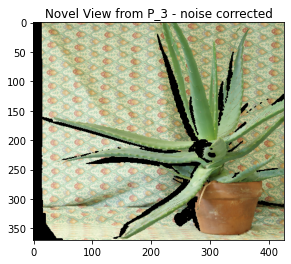

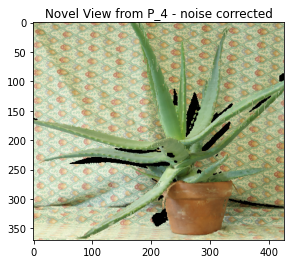

In [4]:
"""			3.3  Novel View				"""
# get camera matrices for the two views
P_3, K_3 = geometry.get_camera_matrices(focal_length=data.FOCAL_LENGTH, base_line=-data.BASELINE,
										x_0=x_0, y_0=y_0)
P_4, K_4 = geometry.get_camera_matrices(focal_length=data.FOCAL_LENGTH, base_line=data.BASELINE/2,
										x_0=x_0, y_0=y_0)
# TODO: why not points_all
novel_image_3 = geometry.novel_view_image(points=points_all.reshape(4, -1), point_colors=point_colors_all.reshape(-1, 3),
										  P=P_3, h=h, w=w)
novel_image_4 = geometry.novel_view_image(points=points_all.reshape(4, -1), point_colors=point_colors_all.reshape(-1, 3),
										  P=P_4, h=h, w=w)
cleaned_novel_image_3 = geometry.remove_black_stripes(novel_image_3)
cleaned_novel_image_4 = geometry.remove_black_stripes(novel_image_4)
visualization.plot_image(cleaned_novel_image_3 / 255, title="Novel View from P_3 - noise corrected")
visualization.plot_image(cleaned_novel_image_4 / 255, title="Novel View from P_4 - noise corrected")


In [4]:
print("hello")
!where python

hello
C:\Users\user\anaconda3\envs\projectMVG\python.exe
C:\Users\user\AppData\Local\Programs\Python\Python38-32\python.exe
C:\Users\user\AppData\Local\Microsoft\WindowsApps\python.exe


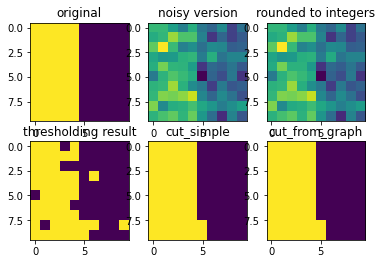

[[-23  -8   0]
 [ -8 -23  -8]
 [  0  -8 -23]]


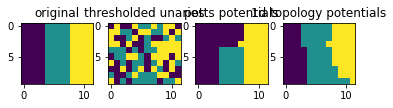

In [3]:
"""				4.1 					"""
#from pygco import cut_from_graph
#disparity = cut_from_graph(edges, unary_cost, pairwise_cost, algorithm)
import example


In [ ]:
"""				Finish					"""
plt.show()